## Canonical New Keynesian model

Euler: $y_t = E_t(y_{t+1}) - \frac{1}{\gamma} (i_t - E_t(\pi_{t+1})$   
Labor: $\eta (y_t - z_{t-1}) = \gamma y_t + w_t$  
Monetary Policy Rule: $i_t = \phi_t \pi_t + \phi_y y_t + v_t$  

#### Sticky Price Model with Calvo Pricing
NK Phillips Curve $\pi_t = \frac{(1-\theta)(1-\beta \theta)}{\theta} (w_t - z_t) + \beta E_t(\pi_{t+1})$

#### Flexible Price Model
$w_t=z_t$

#### Shocks
Productivity Shock: $z_t = \rho z_{t-1} + \epsilon^{z}_{t}$  
Monetary Policy Shock: $v_t = \rho v_{t-1} + \epsilon^{v}_{t}$

In [1]:
from linear_model import *

# Parameters
params_sticky = {'gammma':1.0, 'phi_p':1.5, 'phi_y':0.0, 'eta':1.5, 'rho':0.5, 'theta':2/3, 'betta':1.03**(-1/4)}
params_flex = {'gammma':1.0, 'phi_p':1.5, 'phi_y':0.0, 'eta':1.5, 'rho':0.5, 'betta':1.03**(-1/4)}

# Variables
variables=({'var':('y', 'i', 'z', 'p', 'w', 'v'), # period t
           'varm':('ym', 'im', 'zm', 'pm', 'wm', 'vm'), # period t-1
           'varp':('yp', 'ip', 'zp', 'pp', 'wp', 'vp')}) # period t+1

# Systems of log-linearized equations
# Sticky price model
system_sticky = ([
    '-y+yp-(1/gammma)*(i-pp)', 
    '-eta*(y-zm)-gammma*y+w', 
    '-p+(1-theta)*(1-betta*theta)/theta*(w-zm)+betta*pp',
    '-i+phi_p*p+phi_y*y + vm',
    '-z+rho*zm',
    '-v+rho*vm'])

# Flexible price model
system_flex = ([
    '-y+yp-(1/gammma)*(i-pp)', 
    '-eta*(y-zm)-gammma*y+w', 
    '-w+zm',
    '-i+phi_p*p+phi_y*y+vm',
    '-z+rho*zm',
    '-v+rho*vm'])

In [2]:
# create model instance
model_sticky=linear_model(params_sticky, variables, system_sticky)
model_flex=linear_model(params_flex, variables, system_flex)

In [3]:
# policy functions for sticky price model
model_sticky.policy()

    ym   im        zm   pm   wm        vm
y  0.0  0.0  0.626705  0.0  0.0 -0.746590
i  0.0  0.0 -0.470029  0.0  0.0  0.059942
z  0.0  0.0  0.500000  0.0  0.0  0.000000
p  0.0  0.0 -0.313353  0.0  0.0 -0.626705
w  0.0  0.0  0.066763  0.0  0.0 -1.866474
v  0.0  0.0  0.000000  0.0  0.0  0.500000


In [4]:
# policy functions for flexible price model
model_flex.policy()


    ym   im    zm   pm   wm   vm
y  0.0  0.0  1.00  0.0  0.0  0.0
i  0.0  0.0 -0.75  0.0  0.0 -0.5
z  0.0  0.0  0.50  0.0  0.0  0.0
p  0.0  0.0 -0.50  0.0  0.0 -1.0
w  0.0  0.0  1.00  0.0  0.0  0.0
v  0.0  0.0  0.00  0.0  0.0  0.5


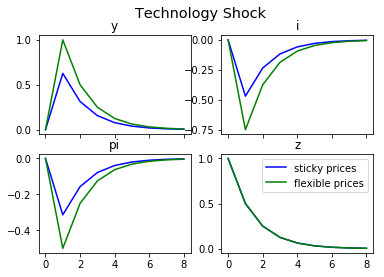

In [5]:
import matplotlib.pyplot as plt

# Technology Shock
irf_sticky = model_sticky.irf('z')
irf_flex = model_flex.irf('z')

x = np.linspace(0,8, 9)
ys = irf_sticky[0,:]
yf = irf_flex[0,:]
ins = irf_sticky[1,:]
inf = irf_flex[1,:]
pis = irf_sticky[3,:]
pif = irf_flex[3,:]
zs = irf_sticky[2,:]
zf = irf_flex[2,:]

f, axarr = plt.subplots(2, 2)
f.suptitle("Technology Shock", fontsize="x-large")

axarr[0, 0].plot(x, ys, 'b', x, yf, 'g')
axarr[0, 0].set_title('y')

axarr[0, 1].plot(x, ins, 'b', x, inf, 'g')
axarr[0, 1].set_title('i')

axarr[1, 0].plot(x, pis, 'b', x, pif, 'g')
axarr[1, 0].set_title('pi')

axarr[1, 1].plot(x, zs, 'b', x, zf, 'g')
axarr[1, 1].set_title('z')
plt.legend(['sticky prices', 'flexible prices'])

# hide x ticks for top plots 
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.show()


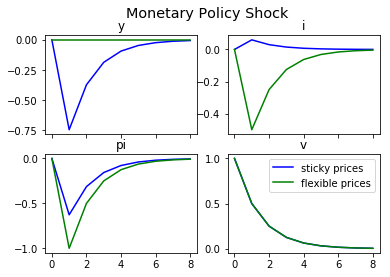

In [6]:
import matplotlib.pyplot as plt

# Technology Shock
irf_sticky = model_sticky.irf('v')
irf_flex = model_flex.irf('v')

x = np.linspace(0,8, 9)
ys = irf_sticky[0,:]
yf = irf_flex[0,:]
ins = irf_sticky[1,:]
inf = irf_flex[1,:]
pis = irf_sticky[3,:]
pif = irf_flex[3,:]
vs = irf_sticky[5,:]
vf = irf_flex[5,:]

f, axarr = plt.subplots(2, 2)
f.suptitle("Monetary Policy Shock", fontsize="x-large")

axarr[0, 0].plot(x, ys, 'b', x, yf, 'g')
axarr[0, 0].set_title('y')

axarr[0, 1].plot(x, ins, 'b', x, inf, 'g')
axarr[0, 1].set_title('i')

axarr[1, 0].plot(x, pis, 'b', x, pif, 'g')
axarr[1, 0].set_title('pi')

axarr[1, 1].plot(x, vs, 'b', x, vf, 'g')
axarr[1, 1].set_title('v')
plt.legend(['sticky prices', 'flexible prices'])

# hide x ticks for top plots 
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.show()